In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline


In [102]:
df = pd.read_csv("../output.csv", sep=";", escapechar="\\")
df

,File,Number of jobs,Numer of families,Setup Class,Setup Times,Distance Index,Initial Lateness,Final Lateness,Jobs order,Jobs families,Jobs Processing Time,Execution Time
0,instances/100-2-0.5-L.txt,100,2,L,"[0, 76, 82, 0]",(distance idx),8940,7492,"[60,34,61,51,72,43,85,38,83,66,62,8,65,29,69,2...","[2,2,2,2,2,2,1,1,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2...","[86,95,60,86,89,16,47,82,51,93,80,95,73,73,75,...",867
1,instances/100-2-0.5-M.txt,100,2,M,"[0, 56, 100, 0]",(distance idx),9261,6957,"[28,85,47,81,94,19,22,36,40,45,62,50,7,54,15,4...","[1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,1,1...","[73,21,70,62,36,20,85,92,37,23,55,89,69,69,3,8...",653
2,instances/100-2-0.5-S.txt,100,2,S,"[0, 15, 19, 0]",(distance idx),3514,3212,"[12,91,2,95,20,45,89,1,30,100,68,69,18,84,56,8...","[1,1,1,2,2,2,2,1,1,2,2,1,1,1,1,1,2,2,2,1,1,2,2...","[51,29,18,24,38,63,13,51,15,49,13,28,59,27,85,...",713
3,instances/100-2-1.5-L.txt,100,2,L,"[0, 69, 98, 0]",(distance idx),4598,2915,"[67,78,1,72,15,66,41,57,48,53,93,17,83,70,21,3...","[1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1...","[61,16,7,46,21,53,7,28,21,76,47,76,89,49,77,48...",1070
4,instances/100-2-1.5-M.txt,100,2,M,"[0, 96, 77, 0]",(distance idx),3925,3090,"[96,8,43,32,30,85,36,84,21,94,49,78,14,77,38,6...","[1,2,2,2,2,2,1,1,1,2,2,2,2,1,1,1,2,2,2,2,1,1,2...","[6,90,66,2,47,80,16,65,64,33,64,94,31,85,95,73...",801
...,...,...,...,...,...,...,...,...,...,...,...,...
139,instances/80-5-2.5-M.txt,80,5,M,"[0, 69, 90, 93, 78, 52, 0, 82, 61, 70, 69, 93,...",(distance idx),959,807,"[33,67,6,57,52,79,69,29,32,22,62,60,30,7,78,17...","[2,3,1,4,1,3,1,4,5,5,5,5,3,1,4,1,3,3,5,1,1,1,4...","[47,80,95,45,73,11,84,95,23,40,28,39,67,65,45,...",147
140,instances/80-5-2.5-S.txt,80,5,S,"[0, 6, 19, 3, 6, 10, 0, 14, 11, 2, 14, 9, 0, 1...",(distance idx),-4,-4,"[21,11,10,48,2,44,23,69,46,67,34,16,35,79,43,1...","[2,1,1,1,5,4,5,3,5,5,2,2,1,4,4,5,5,1,3,5,2,2,1...","[39,76,32,57,78,13,35,5,11,6,77,52,54,14,18,96...",36
141,instances/80-5-3.5-L.txt,80,5,L,"[0, 62, 61, 78, 60, 57, 0, 63, 86, 100, 88, 76...",(distance idx),-248,-248,"[16,56,3,38,68,73,9,62,18,11,6,76,4,64,32,60,3...","[2,1,2,1,2,4,5,5,4,1,2,3,2,4,5,2,3,5,1,1,5,5,5...","[91,6,15,62,94,13,57,96,1,36,69,70,30,54,84,19...",36
142,instances/80-5-3.5-M.txt,80,5,M,"[0, 79, 57, 69, 83, 69, 0, 93, 65, 81, 56, 79,...",(distance idx),271,112,"[29,22,66,42,13,24,11,52,15,73,57,60,8,6,26,27...","[3,2,2,3,2,5,1,4,1,1,1,3,2,1,5,5,5,1,1,5,2,3,3...","[45,97,3,26,70,24,61,70,96,8,74,18,1,43,60,42,...",142


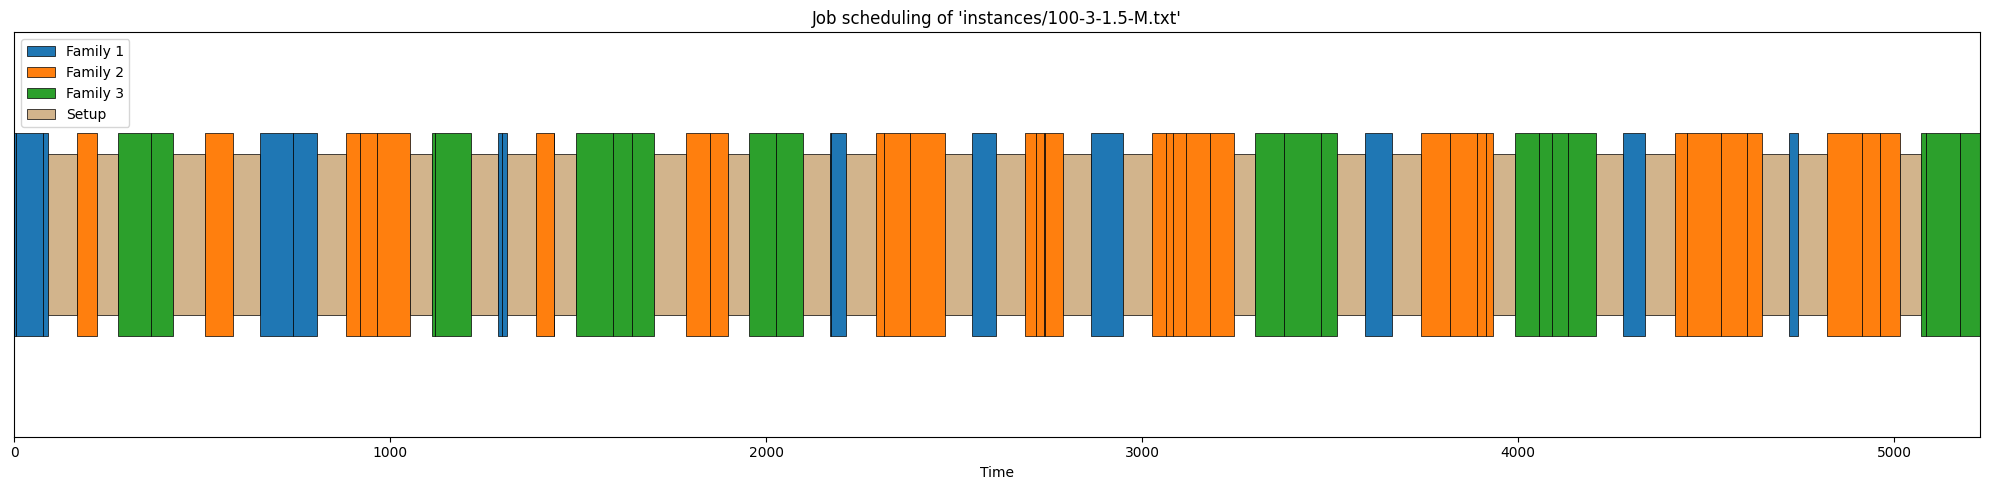

In [85]:
idx = 16
file = df['File'][idx]
times = [int(x) for x in df["Jobs Processing Time"][idx].replace("[", "").replace("]", "").split(",") if x != '']
families = [int(x) for x in df["Jobs families"][idx].replace("[", "").replace("]", "").split(",") if x != '']
setups = [int(x) for x in df["Setup Times"][idx].replace("[", "").replace("]", "").split(",") if x != '']

size = max(families)
setups = np.array(setups).reshape(size,size)
data = zip(times, families)

start_times = np.cumsum([0] + times[:-1])
end_times = np.cumsum(times)

family_colors = {fam: color for fam, color in zip(set(families), mcolors.TABLEAU_COLORS)}

broken_barh_data = [(start, time) for start, time in zip(start_times, times)]

fig, ax = plt.subplots(figsize=(20, 5))

bar_height = 5 * 0.5
bar_y_position = (5 - bar_height) / 2

setup_height = 4 * 0.5
setup_y_position = (5 - setup_height) / 2

last_family = families[0]
acc = 0
is_break = 0
is_print = False
lblb = "setup"
for i, (interval, family) in enumerate(zip(broken_barh_data, families)):

    if (family != last_family):
        setup = setups[last_family - 1][family - 1]
        init = interval[0] + acc

        ax.broken_barh([(init, setup)], (setup_y_position, setup_height), facecolors='tan', label = "Setup" if acc == 0 else "", edgecolors='black', linewidth=0.5)

        acc += setup
        last_family = family
    
    interval = interval[0] + acc, interval[1]
    ax.broken_barh([interval], (bar_y_position, bar_height), facecolors=family_colors[family], label=f"Family {family}" if i == families.index(family) else "", edgecolors="black", linewidth=0.5)
    if is_break == 2: break

ax.set_xlim(0, end_times[-1] + 1)
ax.set_ylim(0, 5)
ax.set_xlabel("Time")
ax.set_yticks([])
ax.set_title(f"Job scheduling of '{file}'")

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc='upper left')


plt.tight_layout()
plt.show()

In [100]:
df["Speedup"] = df["Initial Lateness"] / df["Final Lateness"]

speedup_per_class = df.groupby("Setup Class")["Speedup"].mean()
speedup_per_class
# df


<bound method Series.info of Setup Class
L    1.842437
M    1.407757
S    1.034706
Name: Speedup, dtype: float64>